# Neural_Network_Image_Classification Convolutional Neural Network

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import keras
import matplotlib.pyplot as plt
import pickle
import sys
import numpy as np
import os
from mlxtend.plotting import plot_confusion_matrix
import random
from PIL import Image
from contextlib import redirect_stdout
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
image_width, image_height = 200, 200
epochs = 20
batch_size = 16
test_size = 30
input_shape = (image_width, image_height, 3)
file_path_train = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/train/"
file_path_validation = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/val/"
file_path_test = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/test/"

In [3]:
# def make_model():
#   model = tf.keras.Sequential()

#   model.add(tf.keras.layers.Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
#   model.add(tf.keras.layers.Conv2D(32, 3, 3, padding='same', activation='relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#   model.add(tf.keras.layers.Conv2D(64, 3, 3, padding='same', activation='relu'))
#   model.add(tf.keras.layers.Conv2D(64, 3, 3, padding='same', activation='relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#   # model.add(tf.keras.layers.Conv2D(128, 3, 3, padding='same', activation='relu'))
#   # model.add(tf.keras.layers.Conv2D(128, 3, 3, padding='same', activation='relu'))
#   # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

#   # model.add(tf.keras.layers.Conv2D(256, 3, 3, padding='same', activation='relu'))
#   # model.add(tf.keras.layers.Conv2D(256, 3, 3, padding='same', activation='relu'))
#   # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(64, activation='relu'))
#   model.add(tf.keras.layers.Dropout(0.5))

#   model.add(tf.keras.layers.Dense(64, activation='relu'))
#   model.add(tf.keras.layers.Dropout(0.5))

#   model.add(tf.keras.layers.Dense(1))
#   model.add(tf.keras.layers.Activation('sigmoid'))

#   return model
model = Sequential()

# model.add(Conv2D(16, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
# model.add(Conv2D(16, 3, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [4]:
# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# if tpu:
#   tf.tpu.experimental.initialize_tpu_system(tpu)
#   strategy = tf.distribute.experimental.TPUStrategy(tpu)
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])  
# else:
#   strategy = tf.distribute.get_strategy()
#   print('Running on CPU instead')
# print("Number of accelerators: ", strategy.num_replicas_in_sync)

# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [5]:
model_summary = model.summary()
with open('model_summary.png', 'w') as f:
    with redirect_stdout(f):
        model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 67, 67, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 128)         7

In [6]:
scale = 1./255
training_data_image_classification = ImageDataGenerator(rescale= scale, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
validation_data_image_classification = ImageDataGenerator(rescale= scale)
test_data_image_classification = ImageDataGenerator(rescale= scale)

In [7]:
training_generator = training_data_image_classification.flow_from_directory(file_path_train,
    target_size=(image_width, image_height),
    batch_size=batch_size, class_mode="binary")

Found 1355 images belonging to 20 classes.


In [8]:
validation_generator = validation_data_image_classification.flow_from_directory(file_path_validation,
    target_size=(image_width, image_height),
    batch_size=batch_size, class_mode="binary")

Found 160 images belonging to 20 classes.


In [9]:
test_generator = test_data_image_classification.flow_from_directory(file_path_test,
    target_size=(image_width, image_height),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 188 images belonging to 20 classes.


In [10]:
early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

In [11]:
print(len(training_generator))
print(len(training_generator))
print(len(training_generator))

85


In [14]:
trained_model = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames)//batch_size,
    callbacks=[early],verbose=1)

Epoch 1/20
  85/1355 [>.............................] - 26s 301ms/step - loss: -46049860.0000 - accuracy: 0.0258 - val_loss: -152512176.0000 - val_accuracy: 0.0250


In [27]:
model.save_weights("small_CNN_for_image_detection.h5")

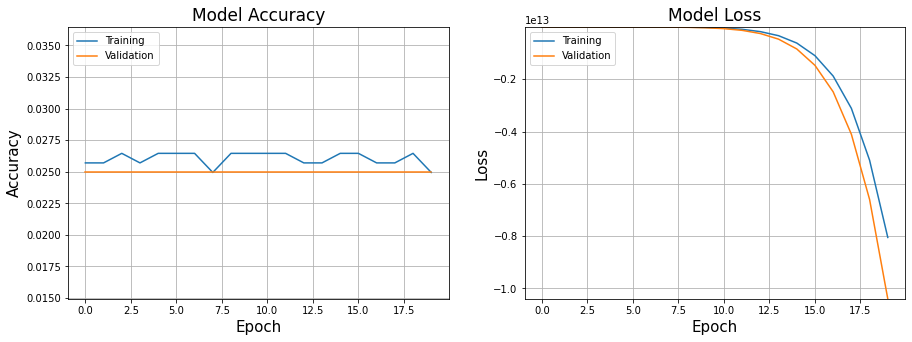

In [28]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']
ylim_pad = [0.01, 0.1]
plt.figure(figsize=(15, 5))
y1 = trained_model.history['accuracy']
y2 = trained_model.history['val_accuracy']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]


plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
    
y1 = trained_model.history['loss']
y2 = trained_model.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)

plt.title('Model Loss', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()                      
plt.show()

In [29]:
print("results")
result  = model.evaluate(test_generator, steps=len(test_generator), verbose=2)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

results
188/188 - 1s - loss: -9.8747e+12 - accuracy: 0.0266
Loss     : -9874659344384.00  
Accuracy : 2.66%


In [30]:
classes = test_generator.class_indices
classes

{'aeroplane': 0,
 'bicycle': 1,
 'bird': 2,
 'boat': 3,
 'bottle': 4,
 'bus': 5,
 'car': 6,
 'cat': 7,
 'chair': 8,
 'cow': 9,
 'diningtable': 10,
 'dog': 11,
 'horse': 12,
 'motorbike': 13,
 'person': 14,
 'pottedplant': 15,
 'sheep': 16,
 'sofa': 17,
 'train': 18,
 'tvmonitor': 19}

In [31]:
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=2)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.
188/188 - 1s


------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 0.18%
Recall        : 4.26%
F1-Score      : 0.35%
------------------------------------------------------------------------------------------





/home/ronaldsonbellande/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


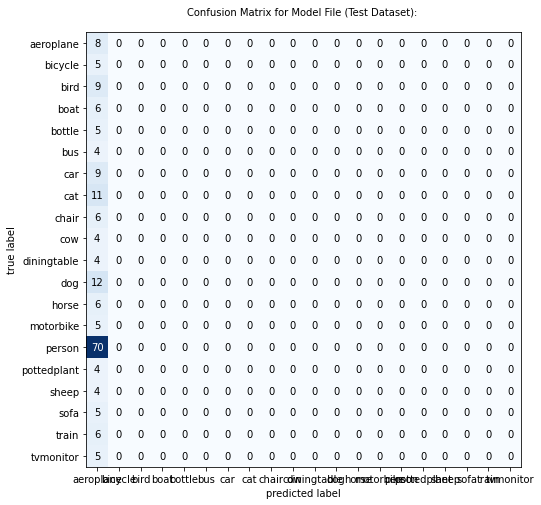




------------------------------------------------------------------------------------------
Report for Model File:  
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

   aeroplane       0.04      1.00      0.08         8
     bicycle       0.00      0.00      0.00         5
        bird       0.00      0.00      0.00         9
        boat       0.00      0.00      0.00         6
      bottle       0.00      0.00      0.00         5
         bus       0.00      0.00      0.00         4
         car       0.00      0.00      0.00         9
         cat       0.00      0.00      0.00        11
       chair       0.00      0.00      0.00         6
         cow       0.00      0.00      0.00         4
 diningtable       0.00      0.00      0.00         4
         dog       0.00      0.00      0.00        12
       horse       0.00      0.00      0.00         6
   motorbike       0.00      0.00

/home/ronaldsonbellande/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
image_file_name = "/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/models_image_files/"

file_path = 'CNN_for_image_detection.h5'
title = file_path.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred, average="weighted") 
recall = recall_score(y_true, y_pred, average="weighted") 
f1 = f1_score(y_true, y_pred, average="weighted") 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true*10, y_pred*10)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(10,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=10)
plt.yticks(range(len(classes)), classes, fontsize=10)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=10)
fig.savefig(image_file_name, dpi=100)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

In [33]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = (y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", (y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 175
-----------------------------------
Batch Size              : 0
-----------------------------------
Accuracy                : 4.26%
-----------------------------------


In [34]:
def show_predictions(test_generator, y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    image_file_name = "/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/models_image_files/"
    file_names = test_generator.filenames
    
    m = {}
    length = len(y_true)

    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = plt.imread(file_path_test+"//"+ file_names[num])
        plt.imshow(img, aspect='auto')

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')  

        fig.savefig(image_file_name, dpi=subplot_params["dpi"])
    
    plt.tight_layout()
    plt.savefig('prediction.png',dpi=500)
    plt.show()

In [35]:
def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs

In [36]:
def subplot(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

In [37]:
def reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [38]:
image_file_name_batch = "/result"
image_file_name_sample = "/sample"

batch_size_t = (y_true_batch)

class_map = {v: k for k, v in test_generator.class_indices.items()}

dpi=100

ncols = 8
nrows = 4

count = ncols*nrows

subplot_params = subplot(nrows, ncols, dpi)
plot_params = reset_plot_params()

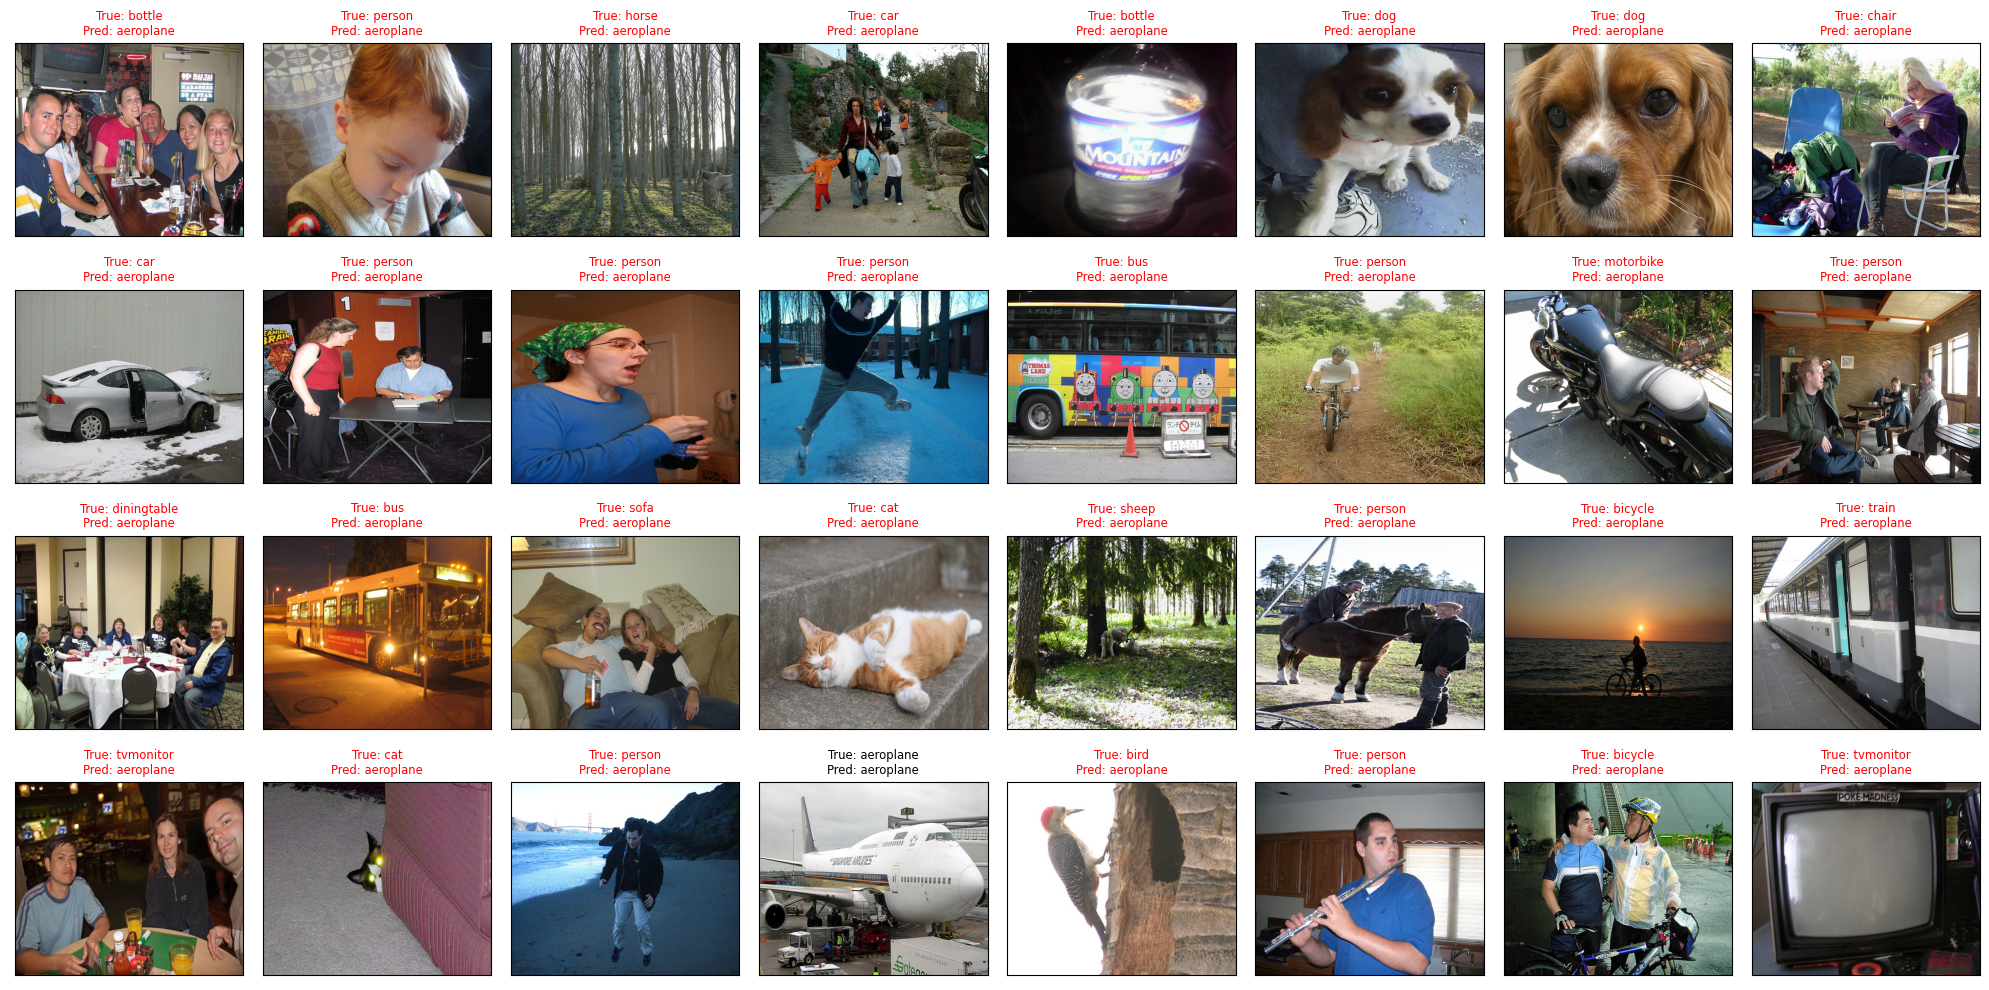

In [39]:
show_predictions(test_generator, y_true, y_pred, subplot_params, plot_params, class_map, file_path_test, image_file_name_batch, count=count, sample=True)